In [1]:
import csv
def get_last_class_id(register_file):
    try:
        # Open the CSV file
        with open(register_file, mode='r') as file:
            reader = csv.reader(file)
            rows = list(reader)  # Read all rows

        if rows:
            # Get the last row and extract the class_id
            last_row = rows[-1]
            last_class_id = int(last_row[0])
              # Assuming the first column is class_id
            return last_class_id
        else:
            return 0  # If the CSV is empty, start with class_id 1
    except FileNotFoundError:
        print(f"File '{register_file}' not found.")
        return 0
    except Exception as e:
        print(f"An error occurred: {e}")
        return 0

# Example usage:
register_file = '/content/register.csv'
last_class_id = get_last_class_id(register_file)
print(f"Last class_id: {last_class_id}")

# Main loop for capturing images for each person
class_id = 1+last_class_id

Last class_id: 18


#** Dont toch important dataset**

In [ ]:



from google.colab import drive
import os

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the project and dataset paths
home_folder = '/content/drive/My Drive/CV_Project_2024-25iiits'
dataset_path = os.path.join(home_folder, 'YFD/data')  # Assuming dataset is in 'dataset' folder inside 'cv project'

# Step 3: List files in the dataset directory to verify the dataset is loaded
print("Files in the dataset folder:")
print(os.listdir(dataset_path))
file_count = 0
for root, dirs, files in os.walk(dataset_path):
    file_count += len(files)

print(f"Total number of files in the dataset and its subfolders: {file_count}")
# Example: Save a model (or any file) to the same project folder
# Step 4: Define the output model save path
model_output_path = os.path.join(home_folder, 'output_model.pth')  # Save model as output_model.pth in 'cv project'

# Example: Assuming you have a PyTorch model, saving the model
import torch
# model = ...  # Define or load your model
# torch.save(model.state_dict(), model_output_path)  # Uncomment when you have a model

print(f"Model would be saved at: {model_output_path}")


Mounted at /content/drive
Files in the dataset folder:
['subject04.rightlight', 'subject02.leftlight', 'subject03.sleepy', 'subject01.rightlight', 'subject04.glasses', 'subject02.sad', 'subject01.wink', 'subject01.leftlight', 'subject02.sleepy', 'subject03.noglasses', 'subject03.leftlight', 'subject01.happy', 'subject01.glasses', 'subject04.noglasses', 'subject02.normal', 'subject02.wink', 'subject03.normal', 'subject02.surprised', 'subject04.happy', 'subject03.centerlight', 'subject01.surprised', 'subject03.happy', 'subject02.glasses', 'subject01.centerlight', 'subject03.glasses', 'subject04.centerlight', 'subject02.happy', 'subject03.sad', 'subject01.noglasses', 'subject02.rightlight', 'subject03.wink', 'subject04.leftlight', 'subject03.surprised', 'subject03.rightlight', 'subject01.sad', 'subject04.normal', 'subject01.normal', 'subject01.sleepy', 'subject02.noglasses', 'subject02.centerlight', 'subject05.sleepy', 'subject08.rightlight', 'subject08.glasses', 'subject07.rightlight', '

In [ ]:
# Imports
!pip install mtcnn

import numpy as np
import torch
import cv2
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from mtcnn import MTCNN

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 53.3 MB/s eta 0:00:00


Shape of RGB image: (243, 320, 3)


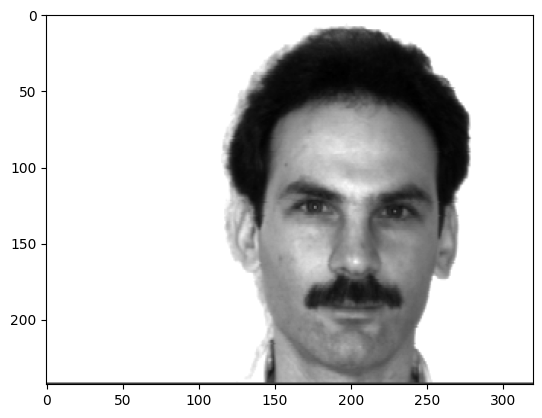

In [ ]:


# Load the grayscale image using matplotlib's imread
filename = "/content/drive/My Drive/CV_Project_2024-25iiits/YFD/data/subject03.sleepy"
pixels = plt.imread(filename)

# Convert grayscale image to 3-channel RGB (as MTCNN expects RGB input)
rgb_pixels = np.stack([pixels, pixels, pixels], axis=-1)
print(f"Shape of RGB image: {rgb_pixels.shape}")

# Display the original grayscale image
plt.imshow(pixels, cmap='gray')
plt.show()

Detected faces: rectangles[[(107, 93) (231, 217)]]
Detected faces: rectangles[[(107, 93) (231, 217)]]


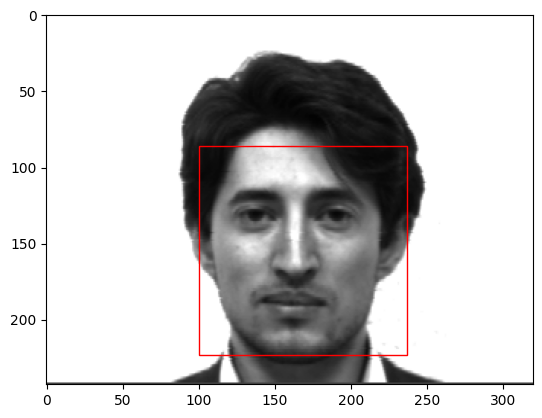

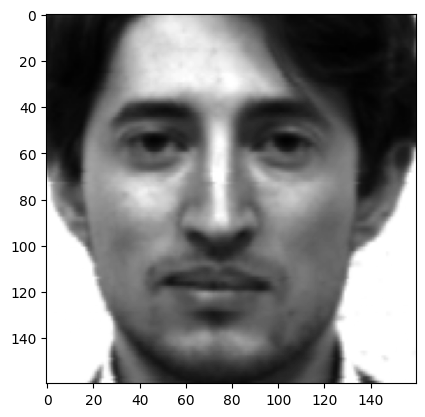

In [ ]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import dlib

# Initialize the dlib face detector
detector = dlib.get_frontal_face_detector()



# Detect faces in the image
results = detector(rgb_pixels)

# Print the detected faces
print(f"Detected faces: {results}")

# Function to adjust the bounding box size (expand the box)
def adjust_box_size(result, expansion_factor=1.2):
    x, y, x2, y2 = result.left(), result.top(), result.right(), result.bottom()
    width = x2 - x
    height = y2 - y

    # Adjust by the expansion factor
    new_x = max(0, int(x - width * (expansion_factor - 1) / 2))
    new_y = max(0, int(y - height * (expansion_factor - 1) / 2))
    new_x2 = min(rgb_pixels.shape[1], int(x2 + width * (expansion_factor - 1) / 2))
    new_y2 = min(rgb_pixels.shape[0], int(y2 + height * (expansion_factor - 1) / 2))

    return new_x, new_y, new_x2, new_y2

# Function to draw rectangles around detected faces
def draw_image_with_boxes(data, result_list):
    print(f"Detected faces: {results}")
    plt.imshow(data)
    ax = plt.gca()  # Get current axes
    for result in result_list:
        x, y, x2, y2 = adjust_box_size(result, expansion_factor=1.1)
        width, height = x2 - x, y2 - y
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(rect)
    plt.show()

# Draw the detected face boxes on the image
if len(results) > 0:
    draw_image_with_boxes(rgb_pixels, results)
else:
    print("No faces detected.")

# Function to extract face and resize it using numpy and PyTorch
def extract_face(pixels, results, required_size=(160, 160)):
    # Ensure at least one face is detected
    if len(results) == 0:
        print("No faces detected.")
        return None

    # Extract the bounding box of the first detected face (dlib format)
    face_rect = results[0]
    x1, y1, x2, y2 = adjust_box_size(face_rect, expansion_factor=1.2)

    # Ensure coordinates are within image bounds
    h, w, _ = pixels.shape
    x1, y1 = max(0, x1), max(0, y1)  # Avoid negative coordinates
    x2, y2 = min(w, x2), min(h, y2)

    # Extract the face from the image
    face = pixels[y1:y2, x1:x2]

    # Resize the face to the required size using PyTorch
    face_tensor = torch.tensor(face).permute(2, 0, 1).unsqueeze(0)  # Add batch and channel dimension
    face_resized = torch.nn.functional.interpolate(face_tensor.float(), size=required_size, mode='bilinear', align_corners=False)

    return face_resized

# Extract face pixels and resize
face_pixels = extract_face(rgb_pixels, results)

# Check if a face was extracted
if face_pixels is not None:
    # Convert tensor back to numpy for grayscale conversion
    face_resized_np = face_pixels.squeeze().permute(1, 2, 0).numpy().astype(np.uint8)

    # Convert to grayscale
    gray_face = cv2.cvtColor(face_resized_np, cv2.COLOR_RGB2GRAY)

    # Display the extracted and resized grayscale face
    plt.imshow(gray_face, cmap='gray')
    plt.show()
else:
    print("No face was extracted.")




In [ ]:
print(face_pixels.shape)

torch.Size([1, 3, 160, 160])


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import torch

# Function to plot a tensor
def plot_tensor(tensor):
    """Plot a tensor as an image."""
    # Convert the tensor to a NumPy array and move the channel dimension to the front
    image_array = tensor.numpy().transpose(1, 2, 0)

    # Display the image
    plt.imshow(image_array)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

# Function to load a tensor from the database given subid and category_id
def load_tensor_from_db(subid, category_id, db_path=db_path):
    """Load a tensor from the database."""
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Query the database for the specific subid and category_id
    cursor.execute('''
        SELECT face FROM images WHERE subject_id = ? AND category_id = ?
    ''', (subid, category_id))

    result = cursor.fetchone()
    conn.close()

    if result is None:
        print(f"No tensor found for subid {subid} and category_id {category_id}.")
        return None

    # Convert the bytes back to a tensor
    face_bytes = result[0]
    face_tensor = torch.from_numpy(np.frombuffer(face_bytes, dtype=np.float32)).view(3, 160, 160)

    return face_tensor
# Example: Load a tensor and plot it
subid_example = 2
category_id_example = 1  # Example category ID (e.g., 'centerlight')
face_tensor = load_tensor_from_db(subid_example, category_id_example)

if face_tensor is not None:
    # Plot the loaded tensor
             plot_tensor(face_tensor)
for category_id_example in range(1, 12):
  for subid_example in range(1, 11):
# Load the tensor from the database
      face_tensor = load_tensor_from_db(subid_example, category_id_example)

# Check if the tensor was loaded successfully
      if face_tensor is not None:
    # Plot the loaded tensor
             plot_tensor(face_tensor)


No tensor found for subid 2 and category_id 1.
No tensor found for subid 1 and category_id 1.
No tensor found for subid 2 and category_id 1.
No tensor found for subid 3 and category_id 1.
No tensor found for subid 4 and category_id 1.
No tensor found for subid 5 and category_id 1.
No tensor found for subid 6 and category_id 1.
No tensor found for subid 7 and category_id 1.
No tensor found for subid 8 and category_id 1.
No tensor found for subid 9 and category_id 1.
No tensor found for subid 10 and category_id 1.
No tensor found for subid 1 and category_id 2.
No tensor found for subid 2 and category_id 2.
No tensor found for subid 3 and category_id 2.
No tensor found for subid 4 and category_id 2.
No tensor found for subid 5 and category_id 2.
No tensor found for subid 6 and category_id 2.
No tensor found for subid 7 and category_id 2.
No tensor found for subid 8 and category_id 2.
No tensor found for subid 9 and category_id 2.
No tensor found for subid 10 and category_id 2.
No tensor f

In [ ]:
!pip install scikit-learn opencv-python dlib mtcnn matplotlib pillow# pyfddb


  Using cached mtcnn-0.1.1-py3-none-any.whl.metadata (5.8 kB)
ERROR: Could not find a version that satisfies the requirement pyfddb (from versions: none)
ERROR: No matching distribution found for pyfddb


In [ ]:
!pip install mtcnn

  Using cached mtcnn-0.1.1-py3-none-any.whl.metadata (5.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 17.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import precision_score, recall_score, f1_score
import cv2
import dlib
from mtcnn import MTCNN
from collections import defaultdict

# Step 1: Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.4, download_if_missing=True)
images = lfw_people.images
target = lfw_people.target
target_names = lfw_people.target_names

# Step 2: Select a subset of 20 subjects, each with 20-30 images
unique_subjects = np.unique(target)
selected_subjects = unique_subjects[:20]

selected_images = []
selected_labels = []

for subject in selected_subjects:
    subject_indices = np.where(target == subject)[0]
    subject_indices = subject_indices[:30]  # Limit to 30 images per subject
    selected_images.extend(images[subject_indices])
    selected_labels.extend([target_names[subject]] * len(subject_indices))

selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)

# Initialize face detection models
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
detector_dlib = dlib.get_frontal_face_detector()
detector_mtcnn = MTCNN()
import cv2
import numpy as np
from sklearn.metrics import precision_score
# Initialize Dlib's face detector
detector_dlib = dlib.get_frontal_face_detector()

# Initialize MTCNN
detector_mtcnn = MTCNN()

def evaluate_model(model_name, images):
    results = []

    for image in images:
        # Check the image shape and type
        print(f"Original image shape: {image.shape}, dtype: {image.dtype}")

        # Convert image to RGB
        rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

        # Ensure the RGB image is of type uint8
        rgb_image = rgb_image.astype(np.uint8)

        # Check the shape and type after conversion
        print(f"Converted RGB image shape: {rgb_image.shape}, dtype: {rgb_image.dtype}")

        # Convert to grayscale for Haar Cascade
        gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)

        # Normalize to uint8 for Haar Cascade
        gray_image = (gray_image * 255).astype(np.uint8)
        print(f"Grayscale image shape: {gray_image.shape}, dtype: {gray_image.dtype}")

        if model_name == "Haar Cascade":
            # Detect faces using Haar Cascade
            faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)
            results.append(1 if len(faces) > 0 else 0)

        elif model_name == "Dlib":
            # Use the RGB image for Dlib
            faces = detector_dlib(rgb_image, 1)
            results.append(1 if len(faces) > 0 else 0)

        elif model_name == "MTCNN":
            # Use the RGB image for MTCNN
            faces = detector_mtcnn.detect_faces(rgb_image)
            results.append(1 if len(faces) > 0 else 0)

    return results

# Assuming `selected_images` is defined and contains your images
metrics = {}
for model in ["Haar Cascade", "Dlib", "MTCNN"]:
    predictions = evaluate_model(model, selected_images)
    accuracy = np.mean(predictions)
    precision = precision_score(np.ones(len(predictions)), predictions)
    metrics[model] = {'accuracy': accuracy, 'precision': precision}

print(metrics)
# Step 5: Determine the best model
best_model = None
best_f1 = 0

for model, m in metrics.items():
    if m['f1_score'] > best_f1:
        best_f1 = m['f1_score']
        best_model = model

# Step 6: Reporting the best model
print("=== Best Model Report ===")
print(f"Model: {best_model}")
print(f"Accuracy: {metrics[best_model]['accuracy']:.2f}")
print(f"Precision: {metrics[best_model]['precision']:.2f}")
print(f"Recall: {metrics[best_model]['recall']:.2f}")
print(f"F1-score: {metrics[best_model]['f1_score']:.2f}")
print("\nSummary:")
print(f"The {best_model} model demonstrated the best performance based on F1-score.")

# Step 7: Visualize the metrics
labels = list(metrics.keys())
accuracies = [m['accuracy'] for m in metrics.values()]
precisions = [m['precision'] for m in metrics.values()]
recalls = [m['recall'] for m in metrics.values()]
f1_scores = [m['f1_score'] for m in metrics.values()]

x = np.arange(len(labels))  # the label locations

# Bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2

bars1 = ax.bar(x - bar_width*1.5, accuracies, width=bar_width, label='Accuracy')
bars2 = ax.bar(x - bar_width/2, precisions, width=bar_width, label='Precision')
bars3 = ax.bar(x + bar_width/2, recalls, width=bar_width, label='Recall')
bars4 = ax.bar(x + bar_width*1.5, f1_scores, width=bar_width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_title('Face Detection Models Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
Original image shape: (50

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Original image shape: (50, 37), dtype: float32
Converted RGB image shape: (50, 37, 3), dtype: uint8
Grayscale image shape: (50, 37), dtype: uint8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Original image shape: (50, 37), dt

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KeyError: 'f1_score'